 # Project 1: Fly Me To The Moon

#### This code provides better data about the top 50 solar flares recorded so far than that shown by [SpaceWeatherLive.com](https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html). In this code, I have scraped data from  [SpaceWeatherLive.com](https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html) and  [Wind/WAVES type II bursts and CMEs](http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html) using requests and BeautifulSoup. I have saved both sets of data as dataframes using Pandas. I have also tidied this data by coding missing observations properly, recoding columns that correspond to more than one piece of information, and treating dates and times appropriately. 

## Install and Import Necessary Packages

In [1]:
!pip3 install lxml

In [2]:
# Import beautifulsoup4, requests, pandas, numpy, re
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import numpy as np

## Step 1: Scrape Your Competitor’s Data

#### This section's code scrapes data for the top 50 solar flares shown in [SpaceWeatherLive.com](https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html) and saves it as a pandas dataframe. <br> The result is a 50 row x 8 column dataframe. 

In [3]:
url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}

# Use requests to get url
response = requests.get(url, headers=headers)

# Use BeautifulSoup to read & parse the data
soup = BeautifulSoup(response.content, 'html.parser')

# Use prettify() to view content & find appropriate table
soup.prettify()

# Use find() to save the table as a variable
table = soup.find("table")

# Use pandas to read in the HTML file
soup_df = pd.read_html(str(table))
soup_df = pd.DataFrame(soup_df[0])
soup_df.columns

# Set reasonable names for the table columns (pandas.DataFrame.columns)
soup_df.rename(columns = {'Unnamed: 0' : 'Rank', 'Unnamed: 1' : 'X Class', 'Unnamed: 2' : 'Date', 'Unnamed: 7' : 'Movie', 'Start' : 'Start Time', 'Maximum' : 'Max Time', 'End' : 'End Time'}, inplace = True)

# Display table with new column names
display(soup_df.head(11))


,Rank,X Class,Date,Region,Start Time,Max Time,End Time,Movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


## Step 2: Tidy the Top 50 Solar Flare Data

#### This section's code tidies the Top 50 Solar Flare data by removing unnecessary data and treating dates and times appropriately by combining into datetime columns. The result is a 50 row x 6 column dataframe.

In [4]:
import datetime

# Drop last column
soup_df = soup_df.drop('Movie', axis=1)

# Combine the date and each of the three time columns into three datetime columns
soup_df['Start Datetime'] = pd.to_datetime(soup_df['Date'].apply(str)+' '+ soup_df['Start Time'])
soup_df['Max Datetime'] = pd.to_datetime(soup_df['Date'].apply(str)+' '+ soup_df['Max Time'])
soup_df['End Datetime'] = pd.to_datetime(soup_df['Date'].apply(str)+' '+ soup_df['End Time'])


# Drop Time Columns & Date Column
soup_df = soup_df.drop('Start Time', axis=1)
soup_df = soup_df.drop('Max Time', axis=1)
soup_df = soup_df.drop('End Time', axis=1)
soup_df = soup_df.drop('Date', axis=1)

# Rearrange Columns
top50_df = soup_df[['Rank', 'X Class', 'Start Datetime', 'Max Datetime', 'End Datetime', 'Region']]

display(top50_df.head(11))

display(top50_df.dtypes)

,Rank,X Class,Start Datetime,Max Datetime,End Datetime,Region
0,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
1,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
2,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
3,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
4,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
5,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
6,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
7,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
8,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
9,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


Rank                       int64
X Class                   object
Start Datetime    datetime64[ns]
Max Datetime      datetime64[ns]
End Datetime      datetime64[ns]
Region                     int64
dtype: object

## Step 3: Scrape the NASA Data

#### This section's code gets additional data about the Top 50 solar flares by scraping data from [Wind/WAVES type II bursts and CMEs](http://www.hcbravo.org/IntroDataSci/misc/waves_type2.html) and saving it as a pandas dataframe. The result is a 524 row x 14 column dataframe. 

In [5]:
url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36'}

# Use requests to get url
response = requests.get(url, headers=headers)

# Use BeautifulSoup to read & parse the data
soup = BeautifulSoup(response.content, 'html.parser')

# Turn data into string of text
text = soup.get_text()

# Split text as a string list item per line
text_list = text.splitlines(0)

# Slice List of text strings to exclude text not in table
text_list = text_list[15:]
text_data = []

# Iterate over each line of text
for line in text_list:
    # Split each word into a string, dropping the column with links to the plots
    row_data = line.split()[:14] 
    text_data.append(row_data)

columns=['start_date','start_time', 'end_date','end_time','start_frequency','end_frequency','flare_location','flare_region','importance','cme_date','cme_time','cpa', 'width','speed']

# Create dataframe from text list
nasa_df = pd.DataFrame(text_data, columns=columns)
nasa_df = nasa_df[["cme_date", "cme_time", "cpa", "end_date", "end_frequency", "end_time", "flare_location", "flare_region", "importance", "speed", "start_date", "start_frequency", "start_time","width"]]

display(nasa_df.head(11))

,cme_date,cme_time,cpa,end_date,end_frequency,end_time,flare_location,flare_region,importance,speed,start_date,start_frequency,start_time,width
0,04/01,15:18,74,04/01,4000,14:15,S25E16,8026,M1.3,312,1997/04/01,8000,14:00,79
1,04/07,14:27,Halo,04/07,1000,17:30,S28E19,8027,C6.8,878,1997/04/07,11000,14:30,360
2,05/12,05:30,Halo,05/14,80,16:00,N21W08,8038,C1.3,464,1997/05/12,12000,05:15,360
3,05/21,21:00,263,05/21,500,22:00,N05W12,8040,M1.3,296,1997/05/21,5000,20:20,165
4,09/23,22:02,133,09/23,2000,22:16,S29E25,8088,C1.4,712,1997/09/23,6000,21:53,155
5,11/03,05:28,240,11/03,250,12:00,S20W13,8100,C8.6,227,1997/11/03,14000,05:15,109
6,11/03,11:11,233,11/03,5000,11:30,S16W21,8100,M4.2,352,1997/11/03,14000,10:30,122
7,11/04,06:10,Halo,11/05,100,04:30,S14W33,8100,X2.1,785,1997/11/04,14000,06:00,360
8,11/06,12:10,Halo,11/07,100,08:30,S18W63,8100,X9.4,1556,1997/11/06,14000,12:20,360
9,11/27,13:56,98,11/27,7000,14:00,N17E63,8113,X2.6,441,1997/11/27,14000,13:30,91


## Step 4: Tidy the NASA Table

#### This section's code tidies the Nasa data by removing unnecessary data and treating dates and times appropriately by coding missing observations properly, recoding columns that correspond to more than one piece of information, and combining dates and times into datetime columns. The result is a 522 row x 13 column dataframe. 

In [6]:
# Drop last two empty rows
nasa_df.drop(nasa_df.tail(2).index,inplace=True)

# Replace empty data with NaN
nasa_df = nasa_df.replace({'????' : np.nan, '---' : np.nan, '-----' : np.nan, '----' : np.nan, '------' \
                                 : np.nan, '--/--' : np.nan, '--:--' : np.nan, 'back' : 'BACK', \
                                 'Back' : 'BACK', 'DSF' : 'FILA'})

# Create new column that indicates if a row corresponds to a halo flare or not
halo_list = [True if i == 'Halo' else False for i in nasa_df['cpa'].tolist()]
nasa_df['is_flare'] = halo_list

# Replace Halo entries in the cme_angle column as np.nan
nasa_df["cpa"].replace({"Halo": np.nan}, inplace=True)

# Create a new column that indicates if width is given as a lower bound
width_list = nasa_df['width'].astype(str).tolist()
lower_bound_list = [True if ">" in i else False for i in width_list]
nasa_df['width_lower_bound'] = lower_bound_list

# Remove any non-numeric part (>) of the width column
num_width_list = [i.replace('>', '') if ">" in i else i for i in width_list]
nasa_df['width'] = num_width_list
nasa_df['width']= nasa_df['width'].str.replace(r'\D+','', regex=True)


In [7]:
# Combine date and time columns for start time
nasa_df['start_datetime'] = pd.to_datetime(nasa_df['start_date'].apply(str)+' '+ nasa_df['start_time'])

# Scrape year from Start time (for end time & cme time)
year = pd.DatetimeIndex(nasa_df['start_datetime']).year

# Replace out of bounds end times (24:00) with in bounds (23:59)
nasa_df['end_time'] = nasa_df.end_time.replace('24:00','23:59')

# Combine date and time columns for end time
nasa_df['end_datetime'] = pd.to_datetime(year.astype(str)+"/"+nasa_df['end_date'].apply(str)+' '+ nasa_df['end_time'])

# Combine date and time columns for cme time
nasa_df['cme_datetime'] = pd.to_datetime(year.astype(str)+"/"+nasa_df['cme_date'].apply(str)+' '+ nasa_df['cme_time'])

# Drop separate time and date columns
nasa_df = nasa_df.drop(['cme_date', 'cme_time', 'end_date', 'end_time', 'start_date', 'start_time'], axis = 1)

# Convert columns to correct data types
dtype_cols = ['width', 'cpa', 'start_frequency', 'end_frequency', 'speed']
nasa_df[dtype_cols] = nasa_df[dtype_cols].apply(pd.to_numeric, axis=1)

# Display columns in correct order
nasa_df = nasa_df[['start_datetime', 'end_datetime', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region', 'importance', 'cme_datetime', 'cpa', 'width', 'speed', 'is_flare', 'width_lower_bound']]
nasa_is_flare = nasa_df[['is_flare', 'importance']]


display(nasa_df.head(11))
display(nasa_df.dtypes)

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,importance,cme_datetime,cpa,width,speed,is_flare,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000.0,4000.0,S25E16,8026,M1.3,1997-04-01 15:18:00,74.0,79.0,312.0,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000.0,1000.0,S28E19,8027,C6.8,1997-04-07 14:27:00,NaN,360.0,878.0,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000.0,80.0,N21W08,8038,C1.3,1997-05-12 05:30:00,NaN,360.0,464.0,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000.0,500.0,N05W12,8040,M1.3,1997-05-21 21:00:00,263.0,165.0,296.0,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000.0,2000.0,S29E25,8088,C1.4,1997-09-23 22:02:00,133.0,155.0,712.0,False,False
5,1997-11-03 05:15:00,1997-11-03 12:00:00,14000.0,250.0,S20W13,8100,C8.6,1997-11-03 05:28:00,240.0,109.0,227.0,False,False
6,1997-11-03 10:30:00,1997-11-03 11:30:00,14000.0,5000.0,S16W21,8100,M4.2,1997-11-03 11:11:00,233.0,122.0,352.0,False,False
7,1997-11-04 06:00:00,1997-11-05 04:30:00,14000.0,100.0,S14W33,8100,X2.1,1997-11-04 06:10:00,NaN,360.0,785.0,True,False
8,1997-11-06 12:20:00,1997-11-07 08:30:00,14000.0,100.0,S18W63,8100,X9.4,1997-11-06 12:10:00,NaN,360.0,1556.0,True,False
9,1997-11-27 13:30:00,1997-11-27 14:00:00,14000.0,7000.0,N17E63,8113,X2.6,1997-11-27 13:56:00,98.0,91.0,441.0,False,False


start_datetime       datetime64[ns]
end_datetime         datetime64[ns]
start_frequency             float64
end_frequency               float64
flare_location               object
flare_region                 object
importance                   object
cme_datetime         datetime64[ns]
cpa                         float64
width                       float64
speed                       float64
is_flare                       bool
width_lower_bound              bool
dtype: object

## #1 Replication

### The top 50 solar flares from the nasa data are not entirely the same as from the Space Weather Live data. Only 29 out of the top 50 solar flares in the Nasa data are the same as the Space Weather Live data.

In [8]:
# Divide X Class by letter and number
nasa_df['firstcol'] = nasa_df['importance'].str.extract(r'([A-Za]+)', expand = True)
nasa_df['secondcol'] = nasa_df['importance'].str.extract(r'(\d+\.?\d*)', expand = True)

# Sort X Class by letter and number
nasa_df['secondcol']= nasa_df['secondcol'].str.ljust(3, fillchar='0')
nasa_df['secondcol'] = pd.to_numeric(nasa_df['secondcol'])
nasa_df = nasa_df.sort_values(by=['firstcol', 'secondcol'], ascending=False)

# Drop unnecessary columns
nasa_copy = nasa_df.copy()
nasa_df = nasa_df.drop(["firstcol","secondcol","start_frequency","end_frequency","flare_location","cpa", "width", "speed", "is_flare", "width_lower_bound"], axis=1)

# Rename columns & change order to Top 50 Solar Flare Data column names
nasa_df = nasa_df.rename(columns={'start_datetime':'Start', 'end_datetime':'End', 'flare_region':'Region', 'importance':'X Class','cme_datetime':'Maximum'})
nasa_df = nasa_df[['X Class', 'Start', 'Maximum', 'End', 'Region']]

# Select top 50 Nasa Solar Flares
nasa_top50_df = nasa_df.head(50)
display(nasa_top50_df)

# Determine overlap of Nasa top 50 and Space Weather Live top 50
real_top50 = nasa_df.loc[nasa_df['X Class'].isin(top50_df['X Class'])]
display(real_top50)
print(len(real_top50))

# Rename Top 50 columns to be the same as Nasa Top 50 columns
top50_df = top50_df.rename(columns={'Start Datetime':'Start', 'End Datetime':'End','Max Datetime':'Maximum'})

,X Class,Start,Maximum,End,Region
240,X28.,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 23:59:00,10486
117,X20.,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393
233,X17.,2003-10-28 11:10:00,2003-10-28 11:30:00,2003-10-29 23:59:00,10486
126,X14.,2001-04-15 14:05:00,2001-04-15 14:06:00,2001-04-16 13:00:00,9415
234,X10.,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 23:59:00,10486
8,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
514,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673
328,X9.0,2006-12-05 10:50:00,NaT,2006-12-05 20:00:00,10930
237,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486
515,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,NaN


,X Class,Start,Maximum,End,Region
8,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100
514,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673
237,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486
515,X8.3,2017-09-10 16:02:00,2017-09-10 16:00:00,2017-09-11 06:50:00,NaN
288,X7.1,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,10720
359,X6.9,2011-08-09 08:20:00,2011-08-09 08:12:00,2011-08-09 08:35:00,11263
331,X6.5,2006-12-06 19:00:00,NaT,2006-12-08 23:59:00,10930
317,X6.2,2005-09-09 19:45:00,2005-09-09 19:48:00,2005-09-09 22:00:00,10808
82,X5.7,2000-07-14 10:30:00,2000-07-14 10:54:00,2000-07-15 14:30:00,9077
121,X5.6,2001-04-06 19:35:00,2001-04-06 19:30:00,2001-04-07 01:50:00,9415


29


## #2 Integration

### The best matching rows across the Nasa & Top 50 Solar Flare datasets are determined by whether their start times and X Classes are the same. The function below first compares the start times of the dataset rows. If the start dates match, the function determines whether the X Classes are the same. The function creates a Rank column in the Nasa Dataset. If the X Classes match, the function appends the row's rank to the Rank Column of the Nasa Dataset.

In [38]:
def best_matching_rows(df1, df2):
   
    # Create Rank column
    df1["Rank"] = ""
    Rank = []
    
    # Loop over both datasets
    for i in range(len(df1)):
        
        rank_i = np.nan
        rank1 = str(df1["X Class"][i])
        
        # Check if X class starts with X
        if nasa_copy["firstcol"][i] == 'X':
            
            for j in range(len(df2)):
            
                # Check if Start dates match
                if df2['Start'][j].date() == df1['Start'][i].date():

                    rank1 = str(df1['X Class'][i])
                    rank1 = rank1.replace('X','')
                    rank1 = rank1.replace('+','')

                    rank2 = str(df2['X Class'][j])
                    rank2 = rank2.replace('X','')
                    rank2 = rank2.replace('+','')

                    rank1 = float(rank1)
                    rank2 = float(rank2)

                    # Check if X Classes match
                    if rank2 == rank1:
                        rank_i = df2.loc[j]["Rank"]
                        
        # Add rank to dataframe if Start date & X Class matches
        df1.at[i, "Rank"] = rank_i
        
    # Sort dataset by Rank
    df1 = df1.sort_values(by=['Rank'])
    
    # Drop rows with no Rank
    df1 = df1.dropna()
    
    return df1

In [39]:
best_matching_rows(nasa_df, top50_df)

,X Class,Start,Maximum,End,Region,Rank
240,X28.,2003-11-04 20:00:00,2003-11-04 19:54:00,2003-11-04 23:59:00,10486,1
117,X20.,2001-04-02 22:05:00,2001-04-02 22:06:00,2001-04-03 02:30:00,9393,2
234,X10.,2003-10-29 20:55:00,2003-10-29 20:54:00,2003-10-29 23:59:00,10486,6
8,X9.4,1997-11-06 12:20:00,1997-11-06 12:10:00,1997-11-07 08:30:00,8100,7
514,X9.3,2017-09-06 12:05:00,2017-09-06 12:24:00,2017-09-07 08:00:00,12673,8
237,X8.3,2003-11-02 17:30:00,2003-11-02 17:30:00,2003-11-03 01:00:00,10486,10
288,X7.1,2005-01-20 07:15:00,2005-01-20 06:54:00,2005-01-20 16:30:00,10720,12
359,X6.9,2011-08-09 08:20:00,2011-08-09 08:12:00,2011-08-09 08:35:00,11263,13
317,X6.2,2005-09-09 19:45:00,2005-09-09 19:48:00,2005-09-09 22:00:00,10808,15
82,X5.7,2000-07-14 10:30:00,2000-07-14 10:54:00,2000-07-15 14:30:00,9077,17


## #3 Analysis Plot

### This analysis plot seeks to answer whether flares in the top 50 tend to have Halo CMEs or not. This bar plot compares the number of Halo CMEs in the top 50 flares vs. the dataset as a whole. The code below calculates the proportion of Halo CMEs in Nasa's top 50 solar flares and the entire Nasa solar flares dataset by taking the average of the is_flare column. 

0.27586206896551724

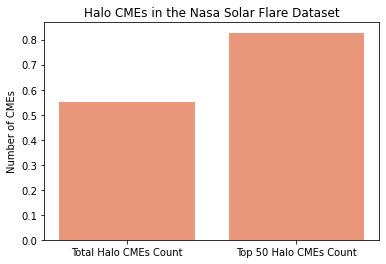

In [13]:
import matplotlib.pyplot as plt

is_flare_top50 = nasa_is_flare.loc[nasa_is_flare['importance'].isin(top50_df['X Class'])]
is_flare_top50 = is_flare_top50.is_flare.mean()
is_flare_total = nasa_is_flare.is_flare.mean()

plt.bar([0,1], [is_flare_total, is_flare_top50], align='center',color='darksalmon')
plt.xticks([0,1], ['Total Halo CMEs Count', 'Top 50 Halo CMEs Count'])
plt.ylabel('Number of CMEs')
plt.title('Halo CMEs in the Nasa Solar Flare Dataset')

is_flare_top50 - is_flare_total

### The above bar graph shows that Nasa's Top 50 solar flares tend to have Halo CMEs. The difference in proportion between the Halo CMEs count for the total data and the Halo CMEs count for the Top 50 data is approximately 28%. 